# IA 340 Mini Project 1

**Project Title** Los Angeles Crime Data from 2020 to Present

## Research Question
How has the number of crimes in Los Angeles changed since 2020

## Dataset Documentation
- **Source** https://catalog.data.gov/dataset/crime-data-from-2020-to-present
- **Description** Crime data of Los Angeles from 2020 to present
- **Time Period** 2020 to Present
- **Reason for Choice** Matches my interest in law enforcement

## Import Data

In [24]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340lab1-bucket-porter/Crime_Data_from_2020_to_Present.csv') # load the data from s3
df.head() #show the top 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


This code imports the dataset into a dataframe and also imports pandas and warnings into the code.

## Clean Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [26]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,327247.000000,1.004980e+06,69160.000000,2314.000000,64.00000,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,363.955300,4.999174e+02,958.101258,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,123.734528,2.050736e+02,110.354348,52.350982,27.06985,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [27]:
df.isnull().sum() #show the number of rows containing null value

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151619
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
LOCATION                0
Cross Street       850755
LAT                     0
LON                     0
dtype: int64

In [28]:
df = df[['DR_NO','Date Rptd','DATE OCC','TIME OCC','AREA','Rpt Dist No','Crm Cd','Vict Age','Premis Cd','Premis Desc','Status','Status Desc','Crm Cd 1','LOCATION','LAT','LON']] # keep specific columns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   DR_NO        1004991 non-null  int64  
 1   Date Rptd    1004991 non-null  object 
 2   DATE OCC     1004991 non-null  object 
 3   TIME OCC     1004991 non-null  int64  
 4   AREA         1004991 non-null  int64  
 5   Rpt Dist No  1004991 non-null  int64  
 6   Crm Cd       1004991 non-null  int64  
 7   Vict Age     1004991 non-null  int64  
 8   Premis Cd    1004975 non-null  float64
 9   Premis Desc  1004403 non-null  object 
 10  Status       1004990 non-null  object 
 11  Status Desc  1004991 non-null  object 
 12  Crm Cd 1     1004980 non-null  float64
 13  LOCATION     1004991 non-null  object 
 14  LAT          1004991 non-null  float64
 15  LON          1004991 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 122.7+ MB


In [30]:
df = df.dropna() #drop null values
df.isnull().sum()

DR_NO          0
Date Rptd      0
DATE OCC       0
TIME OCC       0
AREA           0
Rpt Dist No    0
Crm Cd         0
Vict Age       0
Premis Cd      0
Premis Desc    0
Status         0
Status Desc    0
Crm Cd 1       0
LOCATION       0
LAT            0
LON            0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004392 entries, 0 to 1004990
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   DR_NO        1004392 non-null  int64  
 1   Date Rptd    1004392 non-null  object 
 2   DATE OCC     1004392 non-null  object 
 3   TIME OCC     1004392 non-null  int64  
 4   AREA         1004392 non-null  int64  
 5   Rpt Dist No  1004392 non-null  int64  
 6   Crm Cd       1004392 non-null  int64  
 7   Vict Age     1004392 non-null  int64  
 8   Premis Cd    1004392 non-null  float64
 9   Premis Desc  1004392 non-null  object 
 10  Status       1004392 non-null  object 
 11  Status Desc  1004392 non-null  object 
 12  Crm Cd 1     1004392 non-null  float64
 13  LOCATION     1004392 non-null  object 
 14  LAT          1004392 non-null  float64
 15  LON          1004392 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 130.3+ MB


In [32]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004392 entries, 0 to 1004990
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   DR_NO        1004392 non-null  int64  
 1   Date Rptd    1004392 non-null  object 
 2   DATE OCC     1004392 non-null  object 
 3   TIME OCC     1004392 non-null  int64  
 4   AREA         1004392 non-null  int64  
 5   Rpt Dist No  1004392 non-null  int64  
 6   Crm Cd       1004392 non-null  int64  
 7   Vict Age     1004392 non-null  int64  
 8   Premis Cd    1004392 non-null  float64
 9   Premis Desc  1004392 non-null  object 
 10  Status       1004392 non-null  object 
 11  Status Desc  1004392 non-null  object 
 12  Crm Cd 1     1004392 non-null  float64
 13  LOCATION     1004392 non-null  object 
 14  LAT          1004392 non-null  float64
 15  LON          1004392 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 130.3+ MB


In [33]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce') #change dates from object to datetime64
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004392 entries, 0 to 1004990
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   DR_NO        1004392 non-null  int64         
 1   Date Rptd    1004392 non-null  datetime64[ns]
 2   DATE OCC     1004392 non-null  datetime64[ns]
 3   TIME OCC     1004392 non-null  int64         
 4   AREA         1004392 non-null  int64         
 5   Rpt Dist No  1004392 non-null  int64         
 6   Crm Cd       1004392 non-null  int64         
 7   Vict Age     1004392 non-null  int64         
 8   Premis Cd    1004392 non-null  float64       
 9   Premis Desc  1004392 non-null  object        
 10  Status       1004392 non-null  object        
 11  Status Desc  1004392 non-null  object        
 12  Crm Cd 1     1004392 non-null  float64       
 13  LOCATION     1004392 non-null  object        
 14  LAT          1004392 non-null  float64       
 15  LON          1004392

In [34]:
numeric_cols = ['TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age', 
                'Premis Cd', 'LAT', 'LON', 'Crm Cd 1']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce') #change floats to integers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004392 entries, 0 to 1004990
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   DR_NO        1004392 non-null  int64         
 1   Date Rptd    1004392 non-null  datetime64[ns]
 2   DATE OCC     1004392 non-null  datetime64[ns]
 3   TIME OCC     1004392 non-null  int64         
 4   AREA         1004392 non-null  int64         
 5   Rpt Dist No  1004392 non-null  int64         
 6   Crm Cd       1004392 non-null  int64         
 7   Vict Age     1004392 non-null  int64         
 8   Premis Cd    1004392 non-null  float64       
 9   Premis Desc  1004392 non-null  object        
 10  Status       1004392 non-null  object        
 11  Status Desc  1004392 non-null  object        
 12  Crm Cd 1     1004392 non-null  float64       
 13  LOCATION     1004392 non-null  object        
 14  LAT          1004392 non-null  float64       
 15  LON          1004392

In [35]:
# Victim Age: 0–120 valid
df.loc[(df['Vict Age'] < 0) | (df['Vict Age'] > 120), 'Vict Age'] = pd.NA

df.loc[~df['TIME OCC'].between(0, 2359), 'TIME OCC'] = pd.NA

df.loc[(df['LAT'] < -90) | (df['LAT'] > 90), 'LAT'] = pd.NA
df.loc[(df['LON'] < -180) | (df['LON'] > 180), 'LON'] = pd.NA

valid_areas = range(1, 22)
df.loc[~df['AREA'].isin(valid_areas), 'AREA'] = pd.NA
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004392 entries, 0 to 1004990
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   DR_NO        1004392 non-null  int64         
 1   Date Rptd    1004392 non-null  datetime64[ns]
 2   DATE OCC     1004392 non-null  datetime64[ns]
 3   TIME OCC     1004392 non-null  float64       
 4   AREA         1004392 non-null  float64       
 5   Rpt Dist No  1004392 non-null  int64         
 6   Crm Cd       1004392 non-null  int64         
 7   Vict Age     1004255 non-null  float64       
 8   Premis Cd    1004392 non-null  float64       
 9   Premis Desc  1004392 non-null  object        
 10  Status       1004392 non-null  object        
 11  Status Desc  1004392 non-null  object        
 12  Crm Cd 1     1004392 non-null  float64       
 13  LOCATION     1004392 non-null  object        
 14  LAT          1004392 non-null  float64       
 15  LON          1004392

In [49]:
df.dropna()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Mean_Victim_Age_By_Date,Year,Time_Category
0,211507896,2021-04-11,2020-11-07,845.0,15.0,1502,354,31.0,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,7800 BEEMAN AV,34.2124,-118.4092,30.454183,2020,Morning (06–11h)
1,201516622,2020-10-21,2020-10-18,1845.0,15.0,1521,230,32.0,102.0,SIDEWALK,IC,Invest Cont,230.0,ATOLL AV,34.1993,-118.4203,30.036053,2020,Evening (18–23h)
2,240913563,2024-12-10,2020-10-30,1240.0,9.0,933,354,30.0,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,14600 SYLVAN ST,34.1847,-118.4509,19.737643,2020,Afternoon (12–17h)
3,210704711,2020-12-24,2020-12-24,1310.0,7.0,782,331,47.0,101.0,STREET,IC,Invest Cont,331.0,6000 COMEY AV,34.0339,-118.3747,30.229614,2020,Afternoon (12–17h)
4,201418201,2020-10-03,2020-09-29,1830.0,14.0,1454,420,63.0,103.0,ALLEY,IC,Invest Cont,420.0,4700 LA VILLA MARINA,33.9813,-118.4350,30.221519,2020,Evening (18–23h)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,130.0,21.0,2103,946,35.0,101.0,STREET,IC,Invest Cont,946.0,22100 ROSCOE BL,34.2259,-118.6126,33.000000,2025,Night (00–05h)
1004987,250404100,2025-02-18,2025-02-18,1000.0,4.0,479,237,11.0,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,237.0,3500 PERCY ST,34.0277,-118.1979,3.666667,2025,Morning (06–11h)
1004988,251304095,2025-01-31,2025-01-30,1554.0,13.0,1372,850,16.0,101.0,STREET,IC,Invest Cont,850.0,300 E 53RD ST,33.9942,-118.2701,22.500000,2025,Afternoon (12–17h)
1004989,251704066,2025-01-17,2025-01-17,1600.0,17.0,1774,624,17.0,721.0,HIGH SCHOOL,IC,Invest Cont,624.0,9600 ZELZAH AV,34.2450,-118.5233,48.666667,2025,Afternoon (12–17h)


In [50]:
df.isna().sum()

DR_NO                        0
Date Rptd                    0
DATE OCC                     0
TIME OCC                     0
AREA                         0
Rpt Dist No                  0
Crm Cd                       0
Vict Age                   137
Premis Cd                    0
Premis Desc                  0
Status                       0
Status Desc                  0
Crm Cd 1                     0
LOCATION                     0
LAT                          0
LON                          0
Mean_Victim_Age_By_Date      0
Year                         0
Time_Category                0
dtype: int64

df = df.dropna() #drop null values
df.isna().sum()

All rows with invalid variables were changed to na and then all rows with null or na were cleaned and removed

## Process/Aggregate

In [37]:
mean_victim_age_by_date = df.groupby('Date Rptd')['Vict Age'].mean() #aggregate the average victim age per day
df['Mean_Victim_Age_By_Date'] = df['Date Rptd'].map(mean_victim_age_by_date)
mean_victim_age_by_date.head()

Date Rptd
2020-01-01    31.658192
2020-01-02    31.522613
2020-01-03    31.533499
2020-01-04    29.649083
2020-01-05    32.938095
Name: Vict Age, dtype: float64

In [38]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Mean_Victim_Age_By_Date
0,211507896,2021-04-11,2020-11-07,845.0,15.0,1502,354,31.0,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,7800 BEEMAN AV,34.2124,-118.4092,30.454183
1,201516622,2020-10-21,2020-10-18,1845.0,15.0,1521,230,32.0,102.0,SIDEWALK,IC,Invest Cont,230.0,ATOLL AV,34.1993,-118.4203,30.036053
2,240913563,2024-12-10,2020-10-30,1240.0,9.0,933,354,30.0,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,14600 SYLVAN ST,34.1847,-118.4509,19.737643
3,210704711,2020-12-24,2020-12-24,1310.0,7.0,782,331,47.0,101.0,STREET,IC,Invest Cont,331.0,6000 COMEY AV,34.0339,-118.3747,30.229614
4,201418201,2020-10-03,2020-09-29,1830.0,14.0,1454,420,63.0,103.0,ALLEY,IC,Invest Cont,420.0,4700 LA VILLA MARINA,33.9813,-118.4350,30.221519


This code adds a variable called mean victim age by date, which is based on the date that crime was reported and the average age that the victim was.

## Query

In [39]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

df_sorted = df.sort_values(by='DATE OCC', ascending=True)

df_sorted = df_sorted.reset_index(drop=True)

df_sorted.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Mean_Victim_Age_By_Date
0,200604040,2020-01-01,2020-01-01,120.0,6.0,645,624,27.0,733.0,BAR/SPORTS BAR (OPEN DAY & NIGHT),IC,Invest Cont,624.0,7000 W SUNSET BL,34.0980,-118.3416,31.658192
1,211316043,2021-09-17,2020-01-01,5.0,13.0,1321,860,14.0,721.0,HIGH SCHOOL,IC,Invest Cont,860.0,1900 MAPLE AV,34.0289,-118.2686,29.498233
2,200104020,2020-01-01,2020-01-01,245.0,1.0,153,350,44.0,102.0,SIDEWALK,IC,Invest Cont,350.0,6TH ST,34.0463,-118.2515,31.658192
3,200512151,2020-07-22,2020-01-01,1.0,5.0,518,341,77.0,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,341.0,1600 LAKME AV,33.7956,-118.2609,30.677049
4,200604134,2020-01-02,2020-01-01,1700.0,6.0,632,330,30.0,101.0,STREET,IC,Invest Cont,330.0,8800 HOLLYWOOD BL,34.1008,-118.3788,31.522613


The dataframe has been sorted to show cases in chronological order based on the date occurred variable "DATE OCC".

## Visualizations

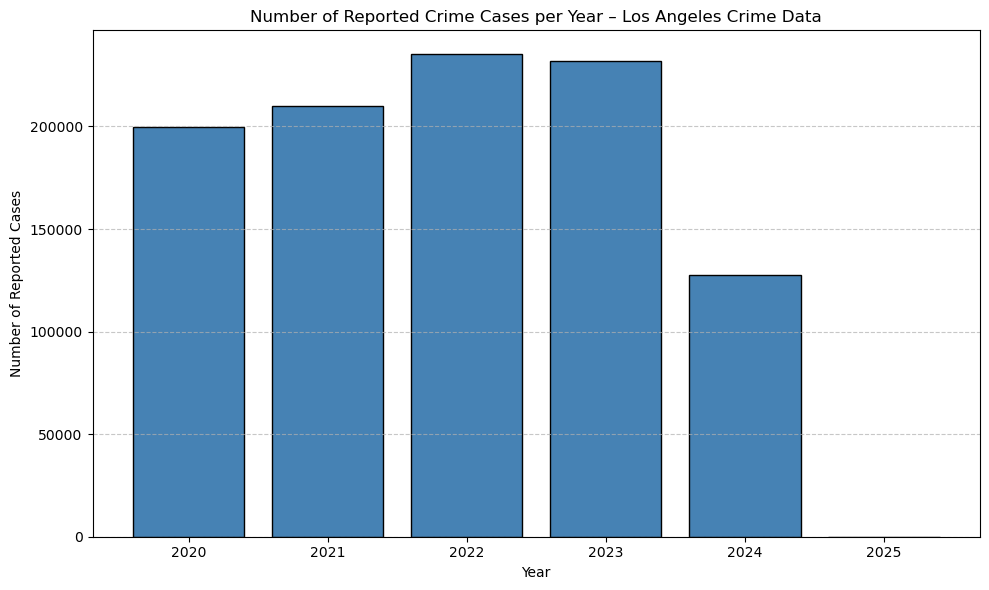

In [40]:
import matplotlib.pyplot as plt
df['Year'] = df['DATE OCC'].dt.year

cases_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(cases_per_year.index, cases_per_year.values, color='steelblue', edgecolor='black')

plt.title('Number of Reported Crime Cases per Year – Los Angeles Crime Data')
plt.xlabel('Year')
plt.ylabel('Number of Reported Cases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

This bar graph shows the number of crime cases per year from 2020-2024 in Los Angeles. The data seems to not have been updated to include the entirety of 2024, hence why there is an abnormally low number of cases in 2024 in the graph.

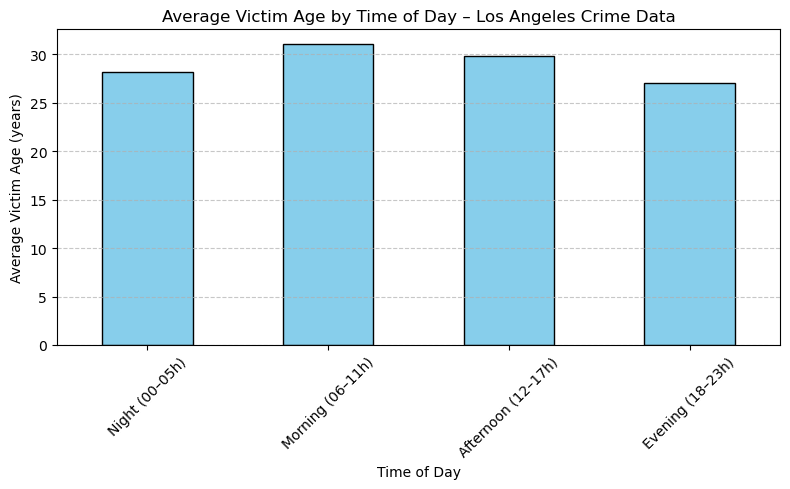

In [41]:

df['Time_Category'] = pd.cut(
    df['TIME OCC'],
    bins=[-1, 559, 1159, 1759, 2359],
    labels=['Night (00–05h)', 'Morning (06–11h)', 'Afternoon (12–17h)', 'Evening (18–23h)']
)

avg_age_by_time = df.groupby('Time_Category')['Vict Age'].mean().sort_index()

plt.figure(figsize=(8,5))
avg_age_by_time.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Victim Age by Time of Day – Los Angeles Crime Data')
plt.xlabel('Time of Day')
plt.ylabel('Average Victim Age (years)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart shows what the average age of the crimes victim is based on the time of day that the crime has been commited. This code groups times together to produce timeframes that are specified on the x-axis for each section.